<a href="https://colab.research.google.com/github/joelvinster/Emotion-recognition/blob/main/Handwritten_Character_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Ensure TensorFlow is using GPU (if available)
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))


TensorFlow version: 2.18.0
Num GPUs Available: 1


In [2]:
# Load dataset (example: MNIST, replace with your dataset)
(train_ds, test_ds), ds_info = tfds.load(
    "mnist",
    split=["train", "test"],
    as_supervised=True,  # Returns (image, label)
    with_info=True
)

# Print dataset information
print(ds_info)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.C0C6L8_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.C0C6L8_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Bu

In [3]:
def preprocess(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32)  # Normalize [0,1]
    image = tf.image.resize(image, (28, 28))  # Resize
    image = tf.expand_dims(image, axis=-1)  # Ensure (28, 28, 1)
    return image, label


In [4]:
BATCH_SIZE = 64

# Apply preprocessing
train_ds = train_ds.map(preprocess).shuffle(10000).batch(BATCH_SIZE)
test_ds = test_ds.map(preprocess).batch(BATCH_SIZE)

# Check a sample batch
for image_batch, label_batch in train_ds.take(1):
    print("Image batch shape:", image_batch.shape)  # Should be (64, 28, 28, 1)
    print("Label batch shape:", label_batch.shape)


Image batch shape: (64, 28, 28, 1, 1)
Label batch shape: (64,)


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # Adjust output for your dataset
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
EPOCHS = 5 # Adjust as needed

history = model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8928 - loss: 0.3622 - val_accuracy: 0.9852 - val_loss: 0.0469
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9848 - loss: 0.0526 - val_accuracy: 0.9874 - val_loss: 0.0370
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9894 - loss: 0.0372 - val_accuracy: 0.9906 - val_loss: 0.0292
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9916 - loss: 0.0252 - val_accuracy: 0.9891 - val_loss: 0.0334
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9937 - loss: 0.0208 - val_accuracy: 0.9906 - val_loss: 0.0292


In [7]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9894 - loss: 0.0321
Test Accuracy: 99.06%


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step 


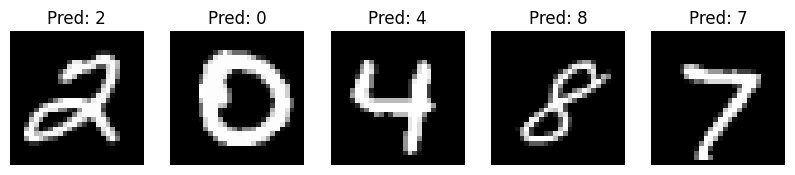

In [8]:
import numpy as np

def show_sample_predictions(dataset, model):
    plt.figure(figsize=(10,5))
    for images, labels in dataset.take(1):  # Take one batch
        predictions = model.predict(images)

        for i in range(5):  # Show 5 samples
            plt.subplot(1, 5, i+1)
            plt.imshow(images[i].numpy().squeeze(), cmap='gray')
            plt.axis('off')
            plt.title(f"Pred: {np.argmax(predictions[i])}")

    plt.show()

show_sample_predictions(test_ds, model)
